In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [1]:
#Q2-Get first 2 rows of data
import pandas as pd

url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"

df = pd.read_csv(url)

print(df.head(2))


   Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470


In [3]:
#Q3-Check if there is missing value
import pandas as pd
url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"

df = pd.read_csv(url)

print(df.isnull().sum())


Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [5]:
#Q4- Get data information and number of rows and columns
import pandas as pd

url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"

df = pd.read_csv(url)


df.info()

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB
Number of rows: 6000
Number of columns: 8


In [6]:
#Q5-Get descriptive statistics of data
import pandas as pd

url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"


df = pd.read_csv(url)


print(df.describe())


       Carat Weight          Price
count   6000.000000    6000.000000
mean       1.334520   11791.579333
std        0.475696   10184.350051
min        0.750000    2184.000000
25%        1.000000    5150.500000
50%        1.130000    7857.000000
75%        1.590000   15036.500000
max        2.910000  101561.000000


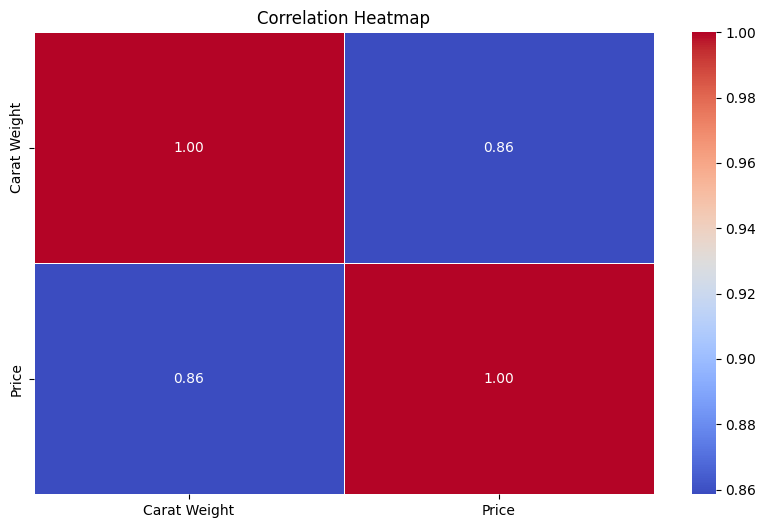

In [9]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"

df = pd.read_csv(url)

numeric_df = df.select_dtypes(include=["number"])

corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap")
plt.show()


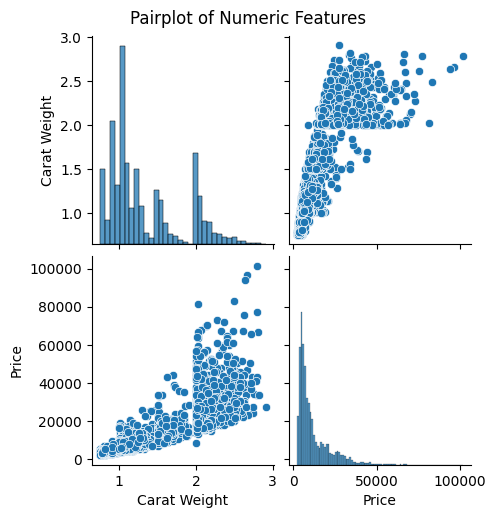

In [10]:
#Q7-Use seasoborns paiplot to generate following  diagram
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"

df = pd.read_csv(url)


numeric_df = df.select_dtypes(include=["number"])

sns.pairplot(numeric_df)

plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


In [11]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
Y = df["Price"]
X = df.drop(columns=["Price"])
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (6000, 7)
Shape of Y: (6000,)


In [12]:
#Q9-Create dummy for the input variables (X)
X_dummies = pd.get_dummies(X, drop_first=True)
print(f"Shape of X after dummy encoding: {X_dummies.shape}")

Shape of X after dummy encoding: (6000, 23)


In [13]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, test_size=0.2, random_state=42)
print({X_train.shape},{Y_train.shape})
print({X_test.shape},{Y_test.shape})

{(4800, 23)} {(4800,)}
{(1200, 23)} {(1200,)}


In [ ]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [15]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
from sklearn.linear_model import LinearRegression # Importing the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score # Importing necessary metrics functions
Y = df["Price"]
X = df.drop(columns=["Price"])
X_dummies = pd.get_dummies(X, drop_first=True)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)
print(f"Train MSE: {train_mse:.2f}, Train R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}")

Train MSE: 13617878.61, Train R²: 0.87
Test MSE: 16395263.36, Test R²: 0.85


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model? No, because the the train and test R² values are close to each other 0.87 vs. 0.85 and the change in MSE is not drastic.

In [24]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric

from sklearn.linear_model import Lasso # Import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_model = Lasso(alpha=1.0) # Create an instance of the Lasso class with a specified alpha value
lasso_model.fit(X_train, Y_train) # Fit the model


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+10, tolerance: 4.943e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [26]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"


df = pd.read_csv(url)


X = df.select_dtypes(include=["number"]).drop("Price", axis=1)
y = df["Price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Training MSE: {train_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing R²: {test_r2:.2f}")


Training MSE: 26553088.85
Training R²: 0.74
Testing MSE: 30112790.91
Testing R²: 0.72


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why? Ridge and Lasso regression can improve test data performance by reducing overfitting through regularization, with Lasso potentially providing better results by eliminating irrelevant features, while Ridge helps when features are highly correlated

In [27]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"


df = pd.read_csv(url)

X = df.select_dtypes(include=["number"]).drop("Price", axis=1)
y = df["Price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing R²: {test_r2:.2f}")


Training MSE: 21289060.36
Training R²: 0.79
Testing MSE: 35063228.19
Testing R²: 0.67


In [28]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"

df = pd.read_csv(url)

X = df.select_dtypes(include=["number"]).drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing R²: {test_r2:.2f}")


Training MSE: 21494017.21
Training R²: 0.79
Testing MSE: 33967094.16
Testing R²: 0.68


Q18-Why Random forest perform better than Decison Tree on test data?Random Forest performs better than Decision Tree on test data because it aggregates the predictions of multiple decision trees, reducing overfitting and improving generalization by averaging out errors.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?Random Forest typically provides the best performance on test data due to its ability to reduce overfitting and capture complex patterns by averaging multiple decision trees.
